In [1]:
import tensorflow as tf
import numpy as np

In [2]:
%matplotlib inline

/Users/jrubin/Developer/learningtensorflow/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [48]:
filename = 'MarshOrchid.jpg'
image = mpimg.imread(filename)

In [49]:
print image.shape

(5528, 3685, 3)


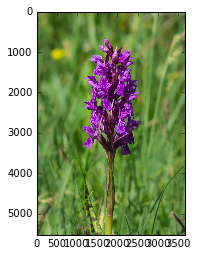

In [9]:
plt.imshow(image)
plt.show()

In [10]:
x = tf.Variable(image, name='x')
model = tf.initialize_all_variables()

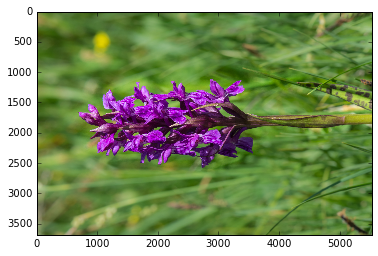

In [15]:
with tf.Session() as session:
    rotated = tf.transpose(x, perm=[1, 0, 2])
    session.run(model)
    plt.imshow(session.run(rotated))
    plt.show()

In [6]:
x = tf.Variable(image, name='x')
model = tf.initialize_all_variables()
height, width, depth = image.shape

In [7]:
print height, width, depth

5528 3685 3


In [52]:
with tf.Session() as session:
    x = tf.reverse_sequence(x, [width]*height, 1, batch_dim=0)
    session.run(model)
    flipped = session.run(x)

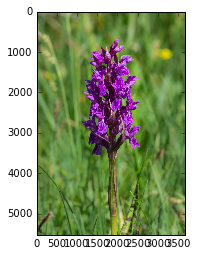

In [53]:
plt.imshow(flipped)
plt.show()

# 1)

In [8]:
# Reload image to ensure original
filename = 'MarshOrchid.jpg'
image = mpimg.imread(filename)

# Setup tensorflow variabes
x = tf.Variable(image, name='x')
model = tf.initialize_all_variables()

with tf.Session() as session:
    trans = tf.transpose(x, perm=[1, 0, 2])
    flip = tf.reverse_sequence(trans, [height]*width, 1, batch_dim=0) # Flip width and height as transpose has occurred
    session.run(model)
    session.run(trans)
    ccw = session.run(flip)

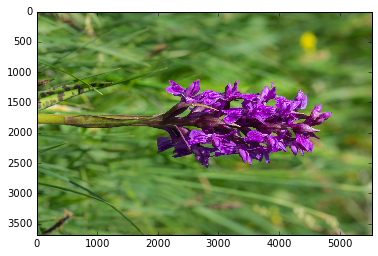

In [9]:
plt.imshow(ccw)

# 2)

In [13]:
# Reload image to ensure original
filename = 'MarshOrchid.jpg'
image = mpimg.imread(filename)

# Setup tensorflow variabes
x = tf.Variable(image, name='x')
model = tf.initialize_all_variables()

with tf.Session() as session:
    trans = tf.transpose(x, perm=[1, 0, 2])
    tf_shape = tf.shape(trans)
    
    # Evalute to get the shape and work with directly in numpy format
    session.run(model)
    shape = session.run(tf_shape)
    
    height, width, depth = shape
    print height, width, depth

    flip = tf.reverse_sequence(trans, [width]*height, 1, batch_dim=0)
    
    session.run(trans)
    ccw = session.run(flip)

3685 5528 3


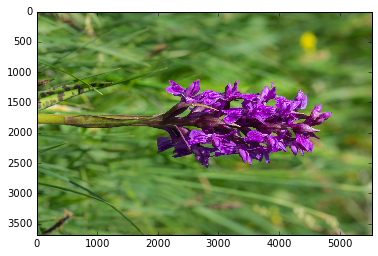

In [14]:
plt.imshow(ccw)

# 3)

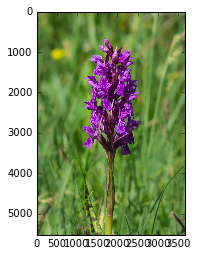

In [22]:
# Reload image to ensure original
filename = 'MarshOrchid.jpg'
image = mpimg.imread(filename)

plt.imshow(image)

# Setup tensorflow variabes
x = tf.Variable(image, name='x')
model = tf.initialize_all_variables()

with tf.Session() as session:
    flip = tf.reverse_sequence(x, [width]*height, seq_dim=0, batch_dim=1)
    session.run(model)
    session.run(trans)
    ccw = session.run(flip)

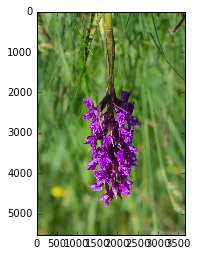

In [23]:
plt.imshow(ccw)